<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_7/IMDb_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Week 7
1. Buat model Deep learning (Pilih TensorFlow atau PyTorch). untuk setiap dataset disamping buatlah BiRNN
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC). Visualisasikan matriks akurasi dan loss.
3. Lakukan Hyperparameter Tuning untuk setiap Hyperparameter yang ada.
4. Akurasi pada Training dan Testing Set Minimal Sebesar 90%.
5. Disarankan untuk mengerjakan tugas menggunakan Google Colab. Coba gunakan Google Colab dengan T4 GPU atau TPU agar proses pelatihan model menjadi lebih cepat.

### Saya menggunakan Tensorflow + Keras Tuner

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load dataset dari TensorFlow Datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=30000)

In [6]:
maxlen = 500
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Visualisasi Data

In [12]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Example label (y_train[0]): {y_train[0]}")
print(f"Example sequence (x_train[0]): {x_train[0][:500]}...")

Shape of x_train: (25000, 500)
Shape of x_test: (25000, 500)
Example label (y_train[0]): 1
Example sequence (x_train[0]): [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
  

In [13]:
# Ambil word_index untuk decode
word_index = keras.datasets.imdb.get_word_index()

# Buat reverse mapping: index -> kata
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

# Function untuk decode angka ke teks
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Tampilkan contoh review
print("\nExample review (decoded):\n")
print(decode_review(x_train[0]))


Example review (decoded):

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

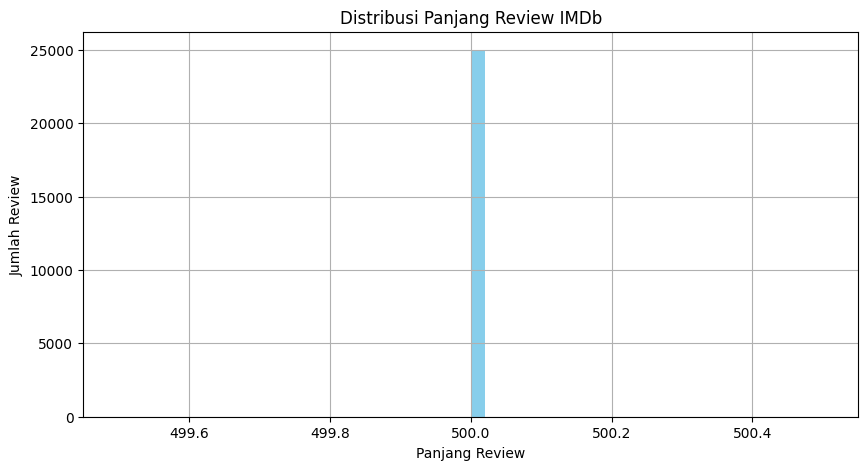

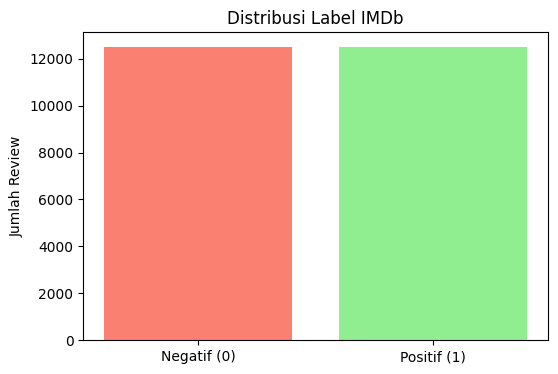

In [14]:
import matplotlib.pyplot as plt

# --- 1. Distribusi Panjang Review ---
raw_x_train, _ = keras.datasets.imdb.load_data(num_words=30000)
review_lengths = [len(review) for review in raw_x_train[0]]

plt.figure(figsize=(10, 5))
plt.hist([len(review) for review in x_train], bins=50, color='skyblue')
plt.title('Distribusi Panjang Review IMDb')
plt.xlabel('Panjang Review')
plt.ylabel('Jumlah Review')
plt.grid(True)
plt.show()

# --- 2. Distribusi Label ---
labels, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, tick_label=['Negatif (0)', 'Positif (1)'], color=['salmon', 'lightgreen'])
plt.title('Distribusi Label IMDb')
plt.ylabel('Jumlah Review')
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Hyperparameters awal (nanti bisa di-tuning pakai Keras Tuner)
vocab_size = 30000  # Jumlah kata unik
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.5

# Build BiRNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=500),
    Bidirectional(LSTM(lstm_units, return_sequences=False)),
    Dropout(dropout_rate),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output binary (positif/negatif)
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 - 597s - 2s/step - accuracy: 0.7568 - loss: 0.4777 - val_accuracy: 0.8613 - val_loss: 0.3279
Epoch 2/5
391/391 - 615s - 2s/step - accuracy: 0.9134 - loss: 0.2337 - val_accuracy: 0.8000 - val_loss: 0.4384
Epoch 3/5
391/391 - 588s - 2s/step - accuracy: 0.9472 - loss: 0.1501 - val_accuracy: 0.8710 - val_loss: 0.3757
Epoch 4/5
391/391 - 630s - 2s/step - accuracy: 0.9648 - loss: 0.0980 - val_accuracy: 0.8678 - val_loss: 0.4377
Epoch 5/5
391/391 - 595s - 2s/step - accuracy: 0.9818 - loss: 0.0559 - val_accuracy: 0.8406 - val_loss: 0.6764


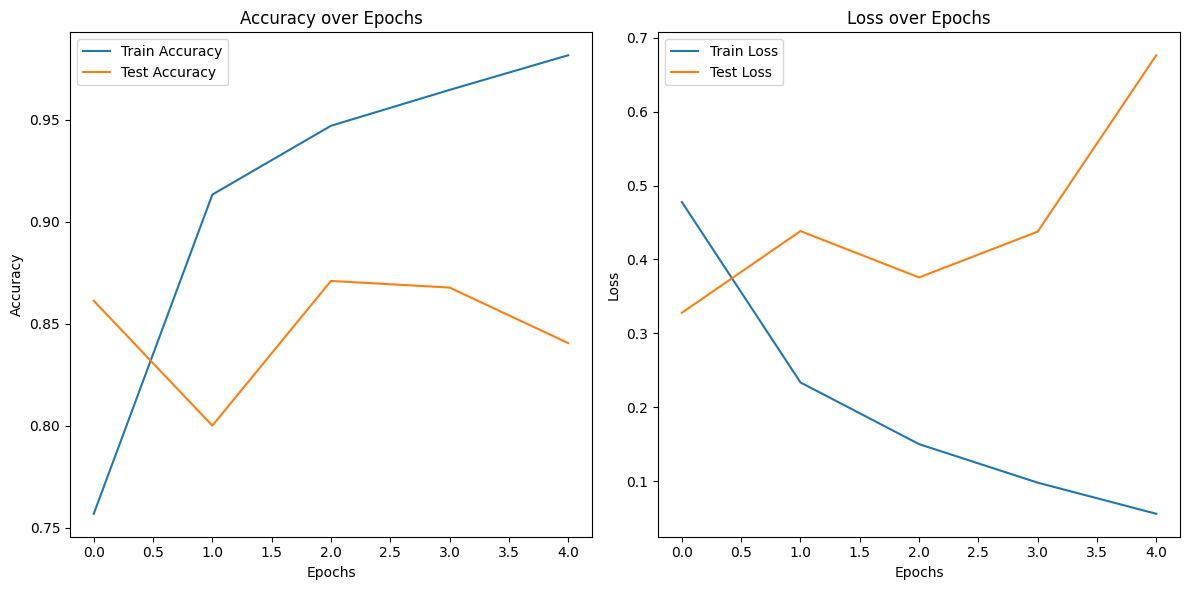

In [16]:
# Training the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=2)

# Plotting Accuracy and Loss
# Akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 147ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 132ms/step
Accuracy: 0.8406
Precision: 0.7858
Recall: 0.9364
F1-Score: 0.8545
AUC: 0.8406


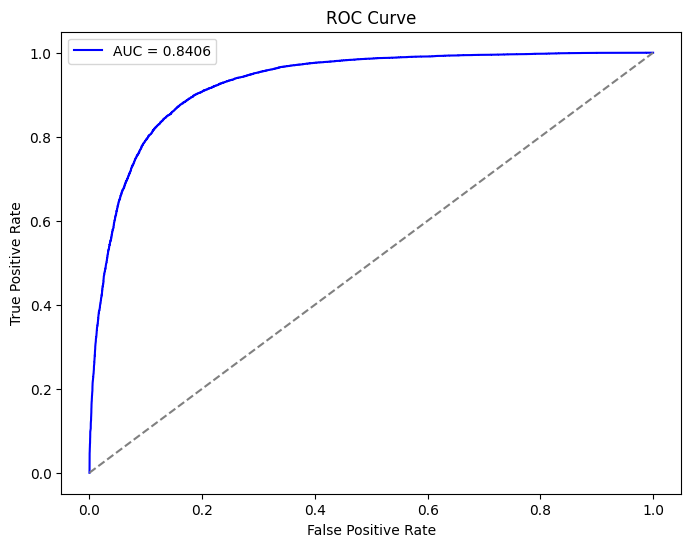

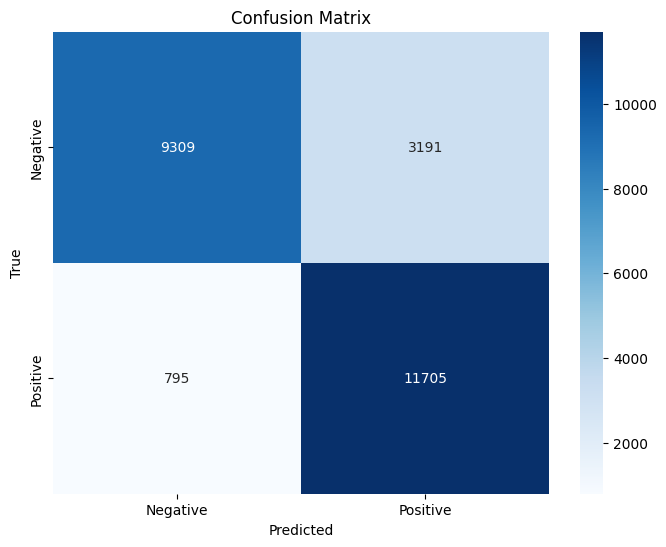

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns

# Prediksi pada test data
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict(x_test))

# Print Metrik
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Confusion Matrix (using seaborn heatmap)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [18]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [19]:
import keras_tuner as kt


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=30000,
        output_dim=hp.Choice('embedding_dim', values=[64, 128, 256]),
        input_length=500
    ))
    model.add(Bidirectional(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False
    )))
    model.add(Dropout(
        hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))
    model.add(Dense(
        hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [21]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Coba 10 kombinasi berbeda (bisa kamu ubah)
    executions_per_trial=1,
    directory='my_dir',
    project_name='imdb_birnn'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
tuner.search(x_train, y_train,
             epochs=5,
             batch_size=64,  # langsung angka, misalnya 64
             validation_data=(x_test, y_test))


Trial 3 Complete [03h 21m 43s]
val_accuracy: 0.859000027179718

Best val_accuracy So Far: 0.8679199814796448
Total elapsed time: 06h 53m 16s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
256               |128               |embedding_dim
224               |96                |lstm_units
0.3               |0.4               |dropout_rate
32                |160               |dense_units

Epoch 1/5
381/391 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.6795 - loss: 0.5831